In [1]:
import numpy as np
import unyt
import swiftsimio as sw
from velociraptor import load
import swiftgalaxy as sg
import functions as fn
from swiftgalaxy import SWIFTGalaxy, MaskCollection
import h5py

In [31]:
dir="/mnt/su3-pro/flamingo/L0200N0360/"

data_h=load(dir+"VR/halos_0008.properties.0")
radius=data_h.radii.rvir

is_mainhalo=data_h.centrals
halo_id=data_h.ids.id-1
mass=data_h.masses.mass_200crit
xc=data_h.positions.xcmbp
yc=data_h.positions.ycmbp
zc=data_h.positions.zcmbp
data_h=[]
mainhalo_id=halo_id[is_mainhalo*(mass>10000)]
print(len(mainhalo_id))


77


In [4]:
#Colibre
#[  1,   3, 122, 127], S<-0.5
soap_dir="../../../mnt/su3-pro/colibre/L0012N0094/THERMAL_AGN/SOAP/"

data_h=sw.load(soap_dir+"/halo_properties_0127.hdf5")
host_id=data_h.soap.host_halo_index#central halo=-1\
halo_id=np.arange(0,len(host_id),1)
mass=data_h.spherical_overdensity_200_crit.total_mass
radius=data_h.bound_subhalo.enclose_radius
xc=data_h.bound_subhalo.centre_of_mass[:,0]
yc=data_h.bound_subhalo.centre_of_mass[:,1]
zc=data_h.bound_subhalo.centre_of_mass[:,2]
print(mass[0])
mainhalo_id=halo_id[(host_id==-1)*(mass>1)]
m_pdm=1.937#10^7
m_pg=1.493#10^7
m_ps=1.124#10^7

0.08654785 10000000000.0*Msun (Physical)


/home/jyang/anaconda3/envs/mypython/lib/python3.12/site-packages/swiftsimio/_array_functions.py:665: RuntimeWarning: Mixing arguments with and without cosmo_factors, continuing assuming provided cosmo_factor (a**0.0 at a=0.9999999999999997) for all arguments.
  warnings.warn(
/home/jyang/anaconda3/envs/mypython/lib/python3.12/site-packages/swiftsimio/_array_functions.py:665: RuntimeWarning: Mixing arguments with and without cosmo_factors, continuing assuming provided cosmo_factor (1 at a=0.9999999999999997) for all arguments.
  warnings.warn(


In [36]:
id=0
print(mass[id])
centre=np.array([xc[id],yc[id],zc[id]])*unyt.Mpc
r=radius[id]
print(r)
sgi=sg.SWIFTGalaxy(dir+"/snapshots/flamingo_0008.hdf5",
                   sg.Standalone(centre=centre,velocity_centre=np.array([0,0,0])*
                                 unyt.km/unyt.s,spatial_offsets=[[-r,r],[-r,r],[-r,r]],extra_mask=None))
#could also use MaskCollection to constrain T


39253.01494241768 10000000000.0*Msun
6.981513281436752 1000.0*kpc


/home/jyang/anaconda3/envs/mypython/lib/python3.12/site-packages/swiftsimio/_array_functions.py:438: RuntimeWarning: Mixing arguments with and without cosmo_factors, continuing assuming provided cosmo_factor (a at a=1.0) for all arguments.
  warnings.warn(
/home/jyang/anaconda3/envs/mypython/lib/python3.12/site-packages/swiftgalaxy/reader.py:2087: RuntimeWarning: Translation assumed to be in comoving (not physical) coordinates.
  warn(


In [38]:
mask=sg.MaskCollection(dark_matter=sgi.dark_matter.spherical_coordinates.r<r,
                       gas=sgi.gas.spherical_coordinates.r<r,
                       stars=sgi.stars.spherical_coordinates.r<r)
sgi.mask_particles(mask)
x_dm=np.array(sgi.dark_matter.cartesian_coordinates.x)
y_dm=np.array(sgi.dark_matter.cartesian_coordinates.y)
z_dm=np.array(sgi.dark_matter.cartesian_coordinates.z)
x_g=np.array(sgi.gas.cartesian_coordinates.x)
y_g=np.array(sgi.gas.cartesian_coordinates.y)
z_g=np.array(sgi.gas.cartesian_coordinates.z)
print(x_dm)
print(fn.offset(x_dm,y_dm,z_dm,x_g,y_g,z_g))

[-5.25619041 -5.50911578 -5.1730268  ...  1.60645123  1.97498251
  2.06476037]
0.15841103686290245


/home/jyang/anaconda3/envs/mypython/lib/python3.12/site-packages/swiftsimio/_array_functions.py:665: RuntimeWarning: Mixing arguments with and without cosmo_factors, continuing assuming provided cosmo_factor ((a**2.0)**0.5 at a=1.0) for all arguments.
  warnings.warn(


In [29]:
#Colibre
id=509
centre=np.array([xc[id],yc[id],zc[id]])*unyt.Mpc
print(centre)
r=radius[id]

sgi=sg.SWIFTGalaxy(soap_dir+"colibre_with_SOAP_membership_0127.hdf5",#dir+"/snapshots/flamingo_0008.hdf5",
                   sg.Standalone(centre=centre,velocity_centre=np.array([0,0,0])*
                                 unyt.km/unyt.s,spatial_offsets=[[-r,r],[-r,r],[-r,r]],extra_mask=None))
mask=sg.MaskCollection(dark_matter=sgi.dark_matter.spherical_coordinates.r<r,
                        gas=(sgi.gas.spherical_coordinates.r<r),
                      stars=sgi.stars.spherical_coordinates.r<r)
sgi.mask_particles(mask)
sgi2=sg.SWIFTGalaxy(soap_dir+"colibre_with_SOAP_membership_0127.hdf5",
    sg.SOAP(soap_dir+"/halo_properties_0127.hdf5",soap_index=id,extra_mask=None))
x_dm=np.array(sgi.dark_matter.cartesian_coordinates.x)
x_dm2=np.array(sgi2.dark_matter.cartesian_coordinates.x)
y_dm2=np.array(sgi2.dark_matter.cartesian_coordinates.y)
#r=np.array(sgi.dark_matter.spherical_coordinates.r)
#r2=np.array(sgi2.dark_matter.spherical_coordinates.r)
y_dm=np.array(sgi.dark_matter.cartesian_coordinates.y)
z_dm=np.array(sgi.dark_matter.cartesian_coordinates.z)
x_g=np.array(sgi.gas.cartesian_coordinates.x)
y_g=np.array(sgi.gas.cartesian_coordinates.y)
z_g=np.array(sgi.gas.cartesian_coordinates.z)

#print(len(sgi.gas.spherical_coordinates.r))


[ 0.26789707 11.907679    8.20078   ] Mpc


/home/jyang/anaconda3/envs/mypython/lib/python3.12/site-packages/swiftsimio/_array_functions.py:438: RuntimeWarning: Mixing arguments with and without cosmo_factors, continuing assuming provided cosmo_factor (a at a=0.9999999999999997) for all arguments.
  warnings.warn(
/home/jyang/anaconda3/envs/mypython/lib/python3.12/site-packages/swiftgalaxy/reader.py:2087: RuntimeWarning: Translation assumed to be in comoving (not physical) coordinates.
  warn(


In [30]:
#print(np.average(x_dm)/len(x_dm),np.average(x_dm2)/len(x_dm2))
#print(np.average(y_dm)/len(y_dm),np.average(y_dm2)/len(y_dm2))

x_g2=np.array(sgi2.gas.cartesian_coordinates.x)
y_g2=np.array(sgi2.gas.cartesian_coordinates.y)
z_g2=np.array(sgi2.gas.cartesian_coordinates.z)
z_dm2=np.array(sgi2.dark_matter.cartesian_coordinates.z)
print(fn.offset(x_dm,y_dm,z_dm,x_g,y_g,z_g))
print(fn.offset(x_dm2,y_dm2,z_dm2,x_g2,y_g2,z_g2))

0.19111015705550927
0.13160334443755853


(array([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]),
 array([-3.39282619, -3.38032634, -3.36782649, -3.35532664, -3.34282679,
        -3.33032695, -3.3178271 , -3.30532725, -3.2928274 , -3.28032755,
        -3.2678277 , -3.25532786, -3.24282801, -3.23032816, -3.21782831,
        -3.20532846, -3.19282862, -3.18032877, -3.16782892, -3.15532907,
        -3.14282922, -3.13032937, -3.11782953, -3.10532968, -3.09282983,
        -3.08032998, -3.06783013, -3.05533028, -3.04283044, -3.03033059,
        -3.01783074, -3.00533089, -2.99283104, -2.9803312 , -2.96783135,
        -2.9553315 , -2.94283165, -2.9303318 , -2.91783195, -2.90533211,
        -2.89283226, -2.88033241, -2.86783256, -2.85533271, -2.84283287,
        -2.83033302, -2.81783317, -2.80533332, -2.79283347, -2.78033362,
        -2.76783378, 

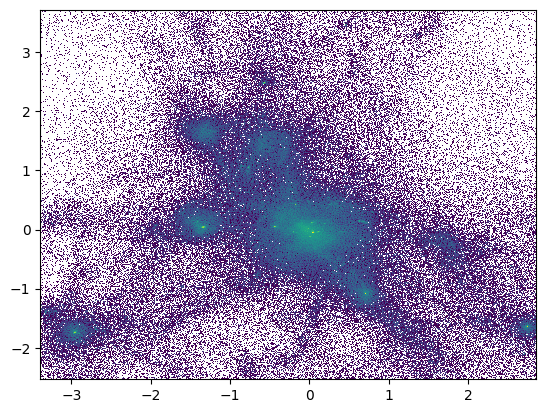

In [14]:
import matplotlib.pyplot as plt
from matplotlib import colors

fig = plt.figure()
ax=plt.subplot(1,1,1)
ax.hist2d(x_g,y_g,norm=colors.LogNorm(),bins=500)

(array([[2., 7., 8., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 1., 0.],
        [1., 0., 0., ..., 1., 0., 1.],
        ...,
        [2., 1., 1., ..., 0., 2., 2.],
        [0., 1., 0., ..., 0., 0., 1.],
        [0., 1., 0., ..., 1., 0., 0.]]),
 array([-3.39288405, -3.38038409, -3.36788412, -3.35538416, -3.34288419,
        -3.33038422, -3.31788426, -3.30538429, -3.29288433, -3.28038436,
        -3.26788439, -3.25538443, -3.24288446, -3.23038449, -3.21788453,
        -3.20538456, -3.1928846 , -3.18038463, -3.16788466, -3.1553847 ,
        -3.14288473, -3.13038477, -3.1178848 , -3.10538483, -3.09288487,
        -3.0803849 , -3.06788494, -3.05538497, -3.042885  , -3.03038504,
        -3.01788507, -3.0053851 , -2.99288514, -2.98038517, -2.96788521,
        -2.95538524, -2.94288527, -2.93038531, -2.91788534, -2.90538538,
        -2.89288541, -2.88038544, -2.86788548, -2.85538551, -2.84288554,
        -2.83038558, -2.81788561, -2.80538565, -2.79288568, -2.78038571,
        -2.76788575, 

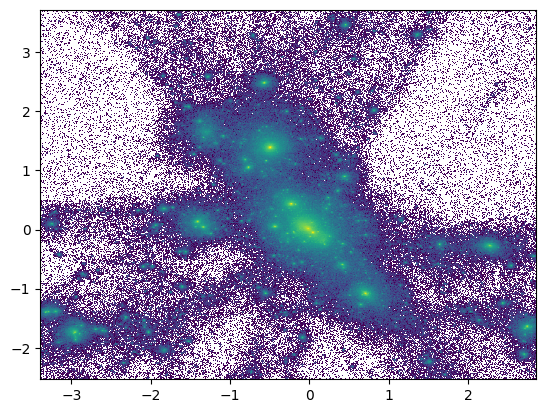

In [19]:

fig = plt.figure()
ax=plt.subplot(1,1,1)
ax.hist2d(x_dm,y_dm,norm=colors.LogNorm(),bins=500)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 cosmo_array([-2.56628162e+00, -2.55501259e+00, -2.54374356e+00, -2.53247453e+00,
        -2.52120549e+00, -2.50993646e+00, -2.49866743e+00, -2.48739840e+00,
        -2.47612937e+00, -2.46486033e+00, -2.45359130e+00, -2.44232227e+00,
        -2.43105324e+00, -2.41978420e+00, -2.40851517e+00, -2.39724614e+00,
        -2.38597711e+00, -2.37470807e+00, -2.36343904e+00, -2.35217001e+00,
        -2.34090098e+00, -2.32963194e+00, -2.31836291e+00, -2.30709388e+00,
        -2.29582485e+00, -2.28455582e+00, -2.27328678e+00, -2.26201775e+00,
        -2.25074872e+00, -2.23947969e+00, -2.22821065e+00, -2.21694162e+00,
        -2.20567259e+00, -2.19440356e+00, -2.18313452e+00, -2.17186549e+00,
        -2.16059646e+00, -2.14932743e+00, -2.13805839e+00, -2

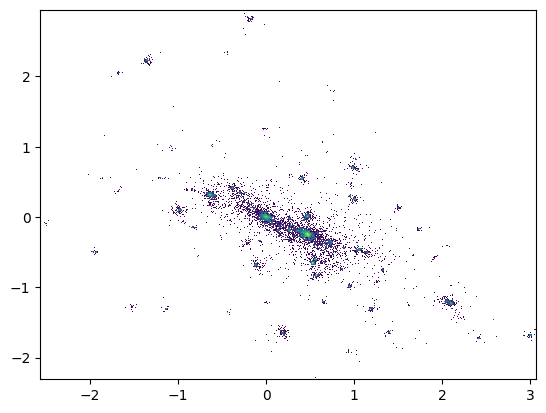

In [65]:
x_s=sgi.stars.cartesian_coordinates.x
y_s=sgi.stars.cartesian_coordinates.y
fig = plt.figure()
ax=plt.subplot(1,1,1)
ax.hist2d(x_s,y_s,norm=colors.LogNorm(),bins=500)